Import libraries

In [2]:
import pandas as pd
import numpy as np

Read in raw data

In [3]:
#read in the raw data from 2015-2023
file15 = pd.read_excel('laucnty15.xlsx')
file16 = pd.read_excel('laucnty16.xlsx')
file17 = pd.read_excel('laucnty17.xlsx')
file18 = pd.read_excel('laucnty18.xlsx')
file19 = pd.read_excel('laucnty19.xlsx')
file20 = pd.read_excel('laucnty20.xlsx')
file21 = pd.read_excel('laucnty21.xlsx')
file22 = pd.read_excel('laucnty22.xlsx')
file23 = pd.read_excel('laucnty23.xlsx')

In [4]:
file15

,Code,State Code,County Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2015.0,25541.0,24206.0,1335.0,5.2
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2015.0,87493.0,82619.0,4874.0,5.6
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2015.0,8590.0,7823.0,767.0,8.9
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2015.0,8552.0,7983.0,569.0,6.7
4,CN0100900000000,1.0,9.0,"Blount County, AL",2015.0,24416.0,23089.0,1327.0,5.4
...,...,...,...,...,...,...,...,...,...
3217,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2015.0,9198.0,7593.0,1605.0,17.4
3218,CN7215300000000,72.0,153.0,"Yauco Municipio, PR",2015.0,10748.0,8717.0,2031.0,18.9
3219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,"SOURCE: BLS, LAUS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Data Preprocessing </h2>

In [5]:
#concat dataset with similar columns
mergedData = pd.concat([file15, file16, file17, file18, file19, file20, file21, file22, file23])
mergedData

,Code,State Code,County Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2015.0,25541.0,24206.0,1335.0,5.2
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2015.0,87493.0,82619.0,4874.0,5.6
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2015.0,8590.0,7823.0,767.0,8.9
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2015.0,8552.0,7983.0,569.0,6.7
4,CN0100900000000,1.0,9.0,"Blount County, AL",2015.0,24416.0,23089.0,1327.0,5.4
...,...,...,...,...,...,...,...,...,...
3218,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2023.0,9365.0,8583.0,782.0,8.4
3219,CN7215300000000,72.0,153.0,"Yauco Municipio, PR",2023.0,10488.0,9278.0,1210.0,11.5
3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,"SOURCE: BLS, LAUS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop null values
mergedData.isnull().sum()
mergedData = mergedData.dropna()

In [7]:
#checking the data types for each column
mergedData.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 28975 entries, 0 to 3219
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code                            28975 non-null  object 
 1   State Code                      28975 non-null  float64
 2   County Code                     28975 non-null  float64
 3   County Name/State Abbreviation  28975 non-null  object 
 4   Year                            28975 non-null  float64
 5   Labor Force                     28975 non-null  object 
 6   Employed                        28975 non-null  object 
 7   Unemployed                      28975 non-null  object 
 8   Unemployment Rate (%)           28975 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.2+ MB


From the results of the merged data, we see that Labor Force, Employed, Unemployed, and Unemployment Rate may have had values that are not numeric. We must remove or drop these rows that do not have numeric values.

In [8]:
#convert all values to numeric, if there are any errors, convert them to NaN
convertData = ['Labor Force', 'Employed', 'Unemployed', 'Unemployment Rate (%)']
mergedData[convertData] = mergedData[convertData].apply(pd.to_numeric, errors='coerce')


/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_65023/1351447561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData[convertData] = mergedData[convertData].apply(pd.to_numeric, errors='coerce')


In [9]:
#checking for validation that all columns are properly converted to correct data types
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28975 entries, 0 to 3219
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code                            28975 non-null  object 
 1   State Code                      28975 non-null  float64
 2   County Code                     28975 non-null  float64
 3   County Name/State Abbreviation  28975 non-null  object 
 4   Year                            28975 non-null  float64
 5   Labor Force                     28897 non-null  float64
 6   Employed                        28897 non-null  float64
 7   Unemployed                      28897 non-null  float64
 8   Unemployment Rate (%)           28897 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [10]:
#check for null values again after conversion to numeric data types
mergedData.isnull().sum()

Code                               0
State Code                         0
County Code                        0
County Name/State Abbreviation     0
Year                               0
Labor Force                       78
Employed                          78
Unemployed                        78
Unemployment Rate (%)             78
dtype: int64

In [11]:
#drop null values for clean data
mergedData.dropna()

,Code,State Code,County Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2015.0,25541.0,24206.0,1335.0,5.2
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2015.0,87493.0,82619.0,4874.0,5.6
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2015.0,8590.0,7823.0,767.0,8.9
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2015.0,8552.0,7983.0,569.0,6.7
4,CN0100900000000,1.0,9.0,"Blount County, AL",2015.0,24416.0,23089.0,1327.0,5.4
...,...,...,...,...,...,...,...,...,...
3215,CN7214500000000,72.0,145.0,"Vega Baja Municipio, PR",2023.0,14333.0,13276.0,1057.0,7.4
3216,CN7214700000000,72.0,147.0,"Vieques Municipio, PR",2023.0,2720.0,2603.0,117.0,4.3
3217,CN7214900000000,72.0,149.0,"Villalba Municipio, PR",2023.0,7819.0,6988.0,831.0,10.6
3218,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2023.0,9365.0,8583.0,782.0,8.4


In [12]:
#summary statistics for the data
mergedData.describe()

,State Code,County Code,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
count,28975.000000,28975.000000,28975.000000,2.889700e+04,2.889700e+04,28897.000000,28897.000000
mean,31.291700,102.920035,2019.000345,5.070170e+04,4.828385e+04,2417.849500,4.797865
std,16.277471,106.660105,2.582056,1.661658e+05,1.574221e+05,9587.776008,2.213048
min,1.000000,1.000000,2015.000000,7.700000e+01,7.300000e+01,4.000000,0.300000
25%,19.000000,35.000000,2017.000000,4.902000e+03,4.640000e+03,221.000000,3.300000
50%,30.000000,79.000000,2019.000000,1.141100e+04,1.085900e+04,542.000000,4.300000
75%,46.000000,133.000000,2021.000000,3.104900e+04,2.959900e+04,1481.000000,5.700000
max,72.000000,840.000000,2023.000000,5.148584e+06,4.917685e+06,611336.000000,24.600000


Split the state abbreviation name to 2 char state name

In [13]:
#add a new column for 2 character state abbreviation, keeping anything after the comma
mergedData['State'] = mergedData['County Name/State Abbreviation'].str.split(',', n=1).str[1]

mergedData

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_65023/3526832575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['State'] = mergedData['County Name/State Abbreviation'].str.split(',', n=1).str[1]


,Code,State Code,County Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),State
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2015.0,25541.0,24206.0,1335.0,5.2,AL
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2015.0,87493.0,82619.0,4874.0,5.6,AL
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2015.0,8590.0,7823.0,767.0,8.9,AL
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2015.0,8552.0,7983.0,569.0,6.7,AL
4,CN0100900000000,1.0,9.0,"Blount County, AL",2015.0,24416.0,23089.0,1327.0,5.4,AL
...,...,...,...,...,...,...,...,...,...,...
3215,CN7214500000000,72.0,145.0,"Vega Baja Municipio, PR",2023.0,14333.0,13276.0,1057.0,7.4,PR
3216,CN7214700000000,72.0,147.0,"Vieques Municipio, PR",2023.0,2720.0,2603.0,117.0,4.3,PR
3217,CN7214900000000,72.0,149.0,"Villalba Municipio, PR",2023.0,7819.0,6988.0,831.0,10.6,PR
3218,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2023.0,9365.0,8583.0,782.0,8.4,PR


In [14]:
#checking all the uniques values for states
mergedData['State'].unique()

array([' AL', ' AK', ' AZ', ' AR', ' CA', ' CO', ' CT', ' DE', nan, ' FL',
       ' GA', ' HI', ' ID', ' IL', ' IN', ' IA', ' KS', ' KY', ' LA',
       ' ME', ' MD', ' MA', ' MI', ' MN', ' MS', ' MO', ' MT', ' NE',
       ' NV', ' NH', ' NJ', ' NM', ' NY', ' NC', ' ND', ' OH', ' OK',
       ' OR', ' PA', ' RI', ' SC', ' SD', ' TN', ' TX', ' UT', ' VT',
       ' VA', ' WA', ' WV', ' WI', ' WY', ' PR'], dtype=object)

In [15]:
mergedData['State'].isnull().sum()
mergedData['State'].dropna()
mergedData.duplicated().sum()

0

In [16]:
mergedData['State'] = mergedData['State'].astype(str) #convert to string
mergedData['State'] = mergedData['State'].str.strip() #remove any white spaces
mergedData['State'].unique()

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_65023/4094291316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['State'] = mergedData['State'].astype(str) #convert to string
/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_65023/4094291316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedData['State'] = mergedData['State'].str.strip() #remove any white spaces


array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'nan', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [17]:
#remove the nan and PR (perto rico) values
mergedData = mergedData[mergedData['State'] != 'nan']
mergedData = mergedData[mergedData['State'] != 'PR']


In [18]:
mergedData['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<h2> Analysis </h2>

In [19]:
#average rate of unemployment for each state
averageUnemployment = mergedData.groupby('State')['Unemployment Rate (%)'].mean()

#sort the average values by descending order
sorted_averageUnemployment = averageUnemployment.sort_values(ascending=False)

#top 5 states with the highest average unemployment rate
top5 = sorted_averageUnemployment.head(5)
print('Top 5 states with highest average unemployment rate: ', top5)

Top 5 states with highest average unemployment rate:  State
AK    8.007170
AZ    6.877778
CA    6.550766
MS    6.271680
WV    6.183434
Name: Unemployment Rate (%), dtype: float64


<h5> Unemployment Rate in California </h5>

In [20]:
californiaUnemployment = averageUnemployment.filter(like='CA', axis=0)
print('Average Unemployment rate % in California is: ', californiaUnemployment)

Average Unemployment rate % in California is:  State
CA    6.550766
Name: Unemployment Rate (%), dtype: float64


In [21]:
#filter out the unemployment rate for California by county
countyUnemployment = mergedData.groupby('County Name/State Abbreviation')['Unemployment Rate (%)'].mean()
countyUnemployment = countyUnemployment.filter(like='CA', axis=0) #filter out the CA values
countyUnemployment = countyUnemployment.sort_values(ascending=False)
print('Top 5 CA counties with highest unemployment rate %:', countyUnemployment.head(5),'\n')
print('Bottom 5 CA counties with lowest unemployment rate %:', countyUnemployment.tail(5))

Top 5 CA counties with highest unemployment rate %: County Name/State Abbreviation
Imperial County, CA    20.033333
Colusa County, CA      13.911111
Tulare County, CA      10.588889
Merced County, CA       9.733333
Kern County, CA         9.333333
Name: Unemployment Rate (%), dtype: float64 

Bottom 5 CA counties with lowest unemployment rate %: County Name/State Abbreviation
Sonoma County, CA                4.188889
Santa Clara County, CA           3.822222
San Francisco County/city, CA    3.711111
Marin County, CA                 3.533333
San Mateo County, CA             3.388889
Name: Unemployment Rate (%), dtype: float64


In [22]:
#query specific county in california where you live
whereUnemployment = countyUnemployment.filter(like='Orange County', axis=0)
print(whereUnemployment)

if (whereUnemployment.values > californiaUnemployment.values):
    print('Orange County has a higher xunemployment rate than the average unemployment rate in California')
else:
    print('Orange County has a lower unemployment rate than the average unemployment rate in California')

County Name/State Abbreviation
Orange County, CA    4.4
Name: Unemployment Rate (%), dtype: float64
Orange County has a lower unemployment rate than the average unemployment rate in California


<h2> Visualize Trends <h2>

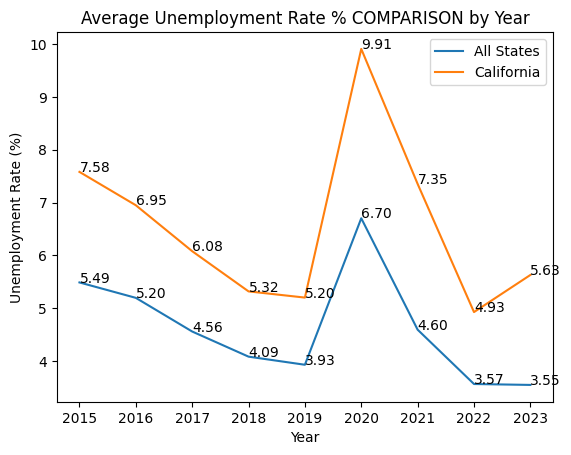

In [23]:
#visualize the average unemployment rate for all states over the years and compare it to California
import matplotlib.pyplot as plt
import seaborn as sns

#filter out state of california
allStatesData = mergedData[mergedData['State'] != 'CA']
CAData = mergedData[mergedData['State'] == 'CA']

#using the average unemployment rate for all states
allStates_Avg = allStatesData.groupby('Year')['Unemployment Rate (%)'].mean().reset_index()
CA_Avg = CAData.groupby('Year')['Unemployment Rate (%)'].mean().reset_index()

#plot the line graph
sns.lineplot(data=allStates_Avg, x='Year', y='Unemployment Rate (%)', label='All States')
sns.lineplot(data=CA_Avg, x='Year', y='Unemployment Rate (%)', label='California')

#add labels to the line graph
plt.title('Average Unemployment Rate % COMPARISON by Year')

#add annotation for each year
#all states
for i in range(len(allStates_Avg)):
    year = allStates_Avg['Year'].loc[i]
    avg = allStates_Avg['Unemployment Rate (%)'].loc[i]
    plt.text(year, avg, f'{avg:.2f}')

#California
for i in range(len(CA_Avg)):
    year = CA_Avg['Year'].loc[i]
    avg = CA_Avg['Unemployment Rate (%)'].loc[i]
    plt.text(year, avg, f'{avg:.2f}')

plt.legend()

<h2>Classification </h2>
- Classify counties into different categories based on their unemployment rates (e.g., low, medium, high). <br>
- Predict whether a county's unemployment rate will increase or decrease in the next time period.

In [24]:
#determine low, medium, and high unemployment rates
CalUnemp_rate = mergedData[mergedData['State'] == 'CA']
CalUnemp_rate['Unemployment Rate (%)'].describe()


count    522.000000
mean       6.550766
std        3.084095
min        2.100000
25%        4.500000
50%        5.950000
75%        7.975000
max       24.600000
Name: Unemployment Rate (%), dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import plotDecisionTree, classificationSummary

#determine thresholds
low = 4.5
medium = 8

#create a new column for unemployment rate category
mergedData['Unemployed Rate Category'] = pd.cut(mergedData['Unemployment Rate (%)'], bins=[0, low, medium, float('inf')], labels=['Low', 'Medium', 'High'])

#set County code as index for later retrieval
mergedData.set_index('County Code', inplace=True)

#CalUnemp_rate: need to reset index later to get the county name
CalUnemp_rate = mergedData[mergedData['State'] == 'CA']

#1. selecting features
x = CalUnemp_rate[['Labor Force', 'Employed', 'Unemployed']]
y = CalUnemp_rate['Unemployed Rate Category']

#2. split test/train
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

#3. classify tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1, min_impurity_decrease= 0.01)
tree.fit(train_X, train_y)

#make predict
y_pred = tree.predict(test_X)

#for each county in CA and their prediction vs actual
comparison = test_X.copy() #make a copy of the test data
comparison['Prediction'] = y_pred #add the prediction column
comparison['Actual'] = test_y #add the actual column

#reset the index for CalUnemp_rate to get the county name
CalUnemp_rate_reset = CalUnemp_rate.reset_index() 
comparison['County'] = CalUnemp_rate_reset.loc[test_X.index, 'County Name/State Abbreviation'] #add the county column

comparison



no display found. Using non-interactive Agg backend


,Labor Force,Employed,Unemployed,Prediction,Actual,County
County Code,,,,,,
17.0,92350.0,89173.0,3177.0,Medium,Low,"Lassen County, CA"
29.0,393736.0,360971.0,32765.0,High,High,"Orange County, CA"
35.0,10363.0,9642.0,721.0,Medium,Medium,"San Bernardino County, CA"
21.0,12803.0,11840.0,963.0,Medium,Medium,"Mariposa County, CA"
97.0,246535.0,238693.0,7842.0,Low,Low,"San Luis Obispo County, CA"
...,...,...,...,...,...,...
25.0,71538.0,55364.0,16174.0,Medium,High,"Mono County, CA"
85.0,1010149.0,961615.0,48534.0,Medium,Medium,"Napa County, CA"
105.0,5141.0,4739.0,402.0,Medium,Medium,"Solano County, CA"


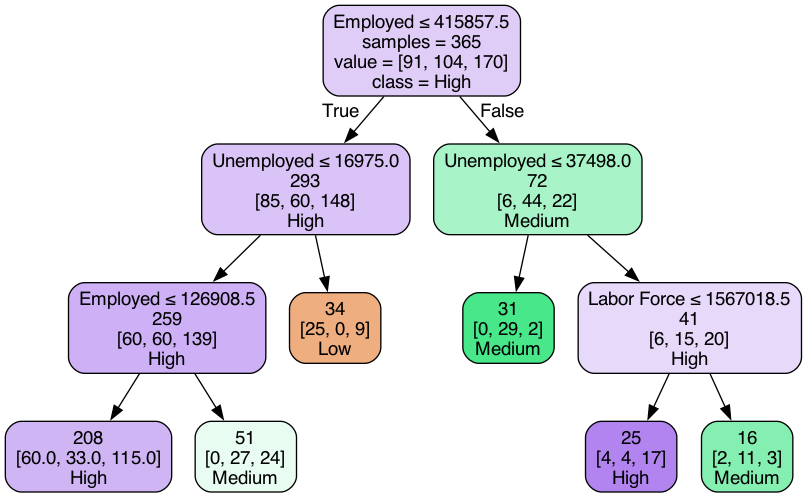

In [26]:
#plot the tree
plotDecisionTree(tree, feature_names=train_X.columns, class_names=['Low', 'Medium', 'High'])

#from the observation, the most important feature is employment, followed by unemployed and labor force.

In [27]:
#confusion matrix for testing sample versus prediction sample
classificationSummary(train_y, tree.predict(train_X))
classificationSummary(test_y, tree.predict(test_X))


Confusion Matrix (Accuracy 0.6137)

       Prediction
Actual   0   1   2
     0  25   2  64
     1   0  67  37
     2   9  29 132
Confusion Matrix (Accuracy 0.5924)

       Prediction
Actual  0  1  2
     0 12  0 24
     1  2 18 18
     2  6 14 63


export the data for visualization

In [28]:
# mergedData.to_csv('cleanData2.csv', index=False)